In [1]:
import pandas as pd
import duckdb as db
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

financial_data = pd.read_csv('./financial_data.csv')
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1000 non-null   object
 1   Revenue   1000 non-null   int64 
 2   Expenses  1000 non-null   int64 
 3   Profit    1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [4]:
financial_data.head()

,Date,Revenue,Expenses,Profit
0,2023-07-23,6779,9187,-2408
1,2023-11-11,15221,7708,7513
2,2023-12-07,8686,8693,-7
3,2023-05-01,5711,4666,1045
4,2023-01-18,6852,9987,-3135


In [5]:
# define sql function

def sql(sql_query: str) -> pd.DataFrame:
    return db.sql(sql_query).to_df()

In [6]:
# convert data type column Date

financial_data['Date'] = pd.to_datetime(financial_data['Date'])

In [7]:
import numpy as np

Descriptive statistics 
---

In [8]:
financial_data.describe(exclude= [np.datetime64])

,Revenue,Expenses,Profit
count,1000.000000,1000.000000,1000.000000
mean,12311.360000,5979.476000,6331.884000
std,4362.996684,2342.899236,4969.539125
min,5023.000000,2004.000000,-4022.000000
25%,8472.750000,3868.750000,2584.000000
50%,12179.500000,5965.000000,6286.000000
75%,15959.750000,8188.500000,10029.750000
max,19989.000000,9999.000000,17869.000000


Time Range
---


In [9]:
sql(
    """
    SELECT 
        MIN(Date) AS earliest_data,
        MAX(Date) AS lates_data
    FROM financial_data
    """
)

,earliest_data,lates_data
0,2023-01-02,2023-12-30


Monthly Trends in Revenue and Profit
---

In [10]:
revenue_profit = sql(
    """
    SELECT 
        DATE_TRUNC('month', Date) AS month,
        SUM(Revenue) AS total_revenue, 
        SUM(Profit) AS total_profit
    FROM financial_data
    GROUP BY month
    ORDER BY month
    """
)
revenue_profit

,month,total_revenue,total_profit
0,2023-01-01,1296287.0,666442.0
1,2023-02-01,971880.0,508637.0
2,2023-03-01,1068769.0,569086.0
3,2023-04-01,1011152.0,544902.0
4,2023-05-01,952889.0,461561.0
5,2023-06-01,735624.0,366990.0
6,2023-07-01,1063433.0,535871.0
7,2023-08-01,984361.0,504072.0
8,2023-09-01,910322.0,464841.0
9,2023-10-01,1085513.0,595927.0


In [11]:
revenue_profit = sql(
    """
    SELECT 
        strftime(month, '%Y %B') AS month,
        total_revenue,
        total_profit
    FROM revenue_profit
    """
)
revenue_profit

,month,total_revenue,total_profit
0,2023 January,1296287.0,666442.0
1,2023 February,971880.0,508637.0
2,2023 March,1068769.0,569086.0
3,2023 April,1011152.0,544902.0
4,2023 May,952889.0,461561.0
5,2023 June,735624.0,366990.0
6,2023 July,1063433.0,535871.0
7,2023 August,984361.0,504072.0
8,2023 September,910322.0,464841.0
9,2023 October,1085513.0,595927.0


In [12]:
revenue_profit = revenue_profit.set_index('month')

In [13]:
revenue_profit

,total_revenue,total_profit
month,,
2023 January,1296287.0,666442.0
2023 February,971880.0,508637.0
2023 March,1068769.0,569086.0
2023 April,1011152.0,544902.0
2023 May,952889.0,461561.0
2023 June,735624.0,366990.0
2023 July,1063433.0,535871.0
2023 August,984361.0,504072.0
2023 September,910322.0,464841.0


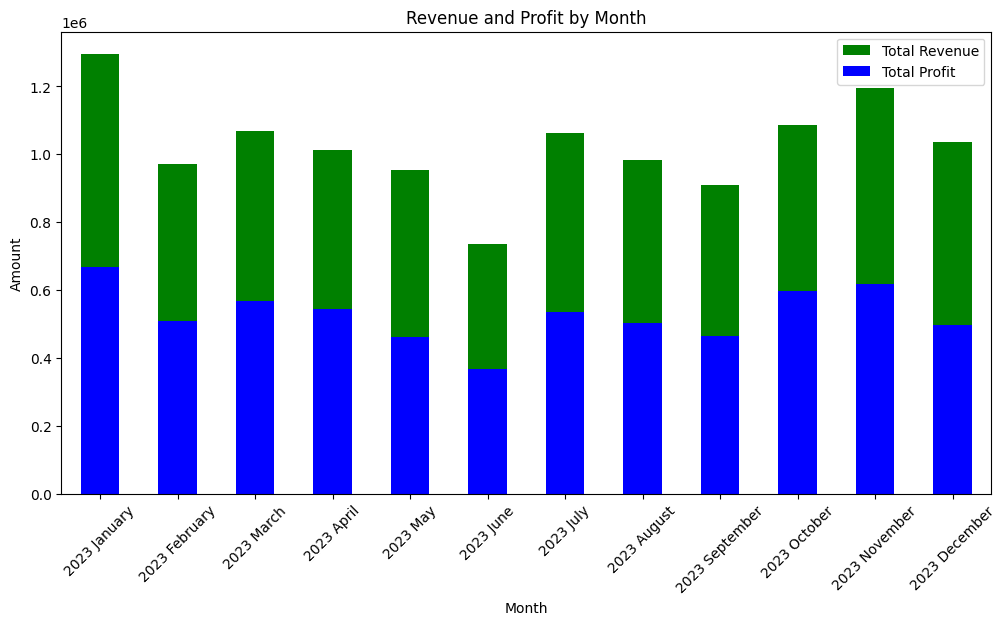

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
revenue_profit['total_revenue'].plot(kind='bar', ax=ax, color='green', label='Total Revenue')
revenue_profit['total_profit'].plot(kind='bar', ax=ax, color='blue', label='Total Profit')

ax.set_title('Revenue and Profit by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Amount')

ax.legend()

plt.xticks(rotation=45)

plt.show()

Monthly Trends in Profit and Expenses
---

In [15]:
profit_expenses = sql(
    """
    SELECT 
        DATE_TRUNC('month', Date) AS month,
        SUM(Expenses) AS total_expenses, 
        SUM(Profit) AS total_profit
    FROM financial_data
    GROUP BY month
    ORDER BY month
    """
)
profit_expenses

,month,total_expenses,total_profit
0,2023-01-01,629845.0,666442.0
1,2023-02-01,463243.0,508637.0
2,2023-03-01,499683.0,569086.0
3,2023-04-01,466250.0,544902.0
4,2023-05-01,491328.0,461561.0
5,2023-06-01,368634.0,366990.0
6,2023-07-01,527562.0,535871.0
7,2023-08-01,480289.0,504072.0
8,2023-09-01,445481.0,464841.0
9,2023-10-01,489586.0,595927.0


In [16]:
profit_expenses = sql(
    """
    SELECT 
        strftime(month, '%Y %B') AS month,
        total_expenses,
        total_profit
    FROM profit_expenses
    """
)

In [17]:
profit_expenses = profit_expenses.set_index('month')
profit_expenses

,total_expenses,total_profit
month,,
2023 January,629845.0,666442.0
2023 February,463243.0,508637.0
2023 March,499683.0,569086.0
2023 April,466250.0,544902.0
2023 May,491328.0,461561.0
2023 June,368634.0,366990.0
2023 July,527562.0,535871.0
2023 August,480289.0,504072.0
2023 September,445481.0,464841.0


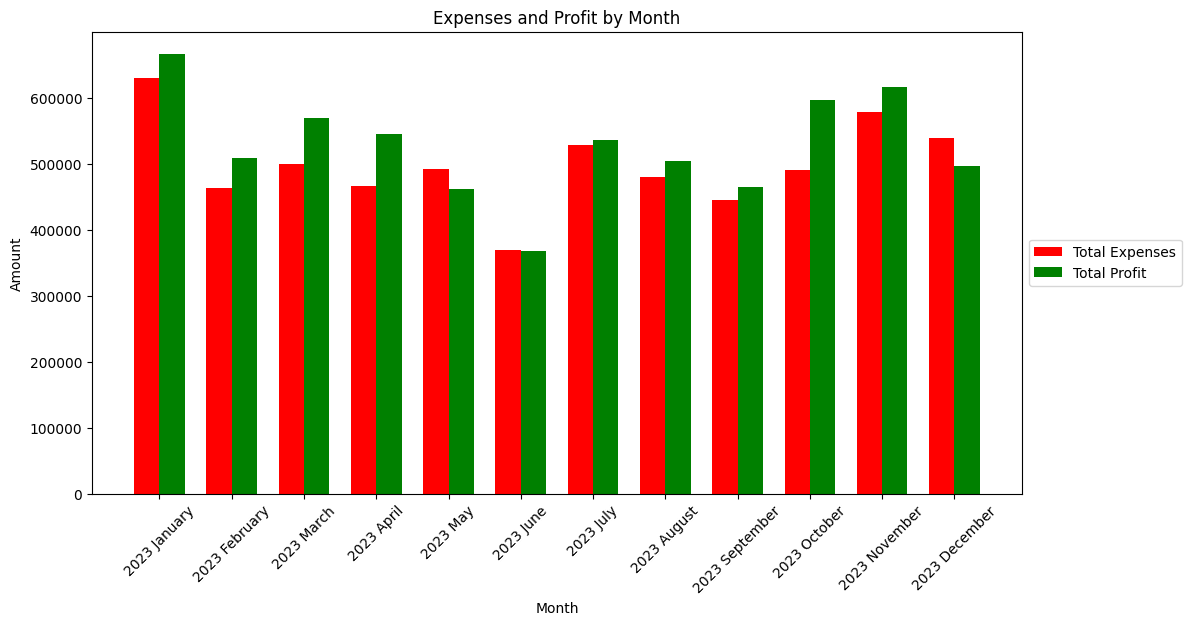

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35  # bar width
index = np.arange(len(profit_expenses.index))  # Index for bar position

# Bar chart for total_expenses
ax.bar(index, profit_expenses['total_expenses'], bar_width, color='red', label='Total Expenses')

# Bar chart for total_profit
ax.bar(index + bar_width, profit_expenses['total_profit'], bar_width, color='green', label='Total Profit')

# Sets the x-axis labels with the values from the DataFrame indices
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(profit_expenses.index, rotation=45)

# Sets the axis titles and labels
ax.set_title('Expenses and Profit by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Amount')

# Add legend
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Shows plot
plt.show()

Months with The Highest and Lowest Profit
---

In [20]:
profit_per_month = sql(
    """
    SELECT 
        DATE_TRUNC('month', Date) AS month,
        SUM(Profit) AS total_profit
    FROM financial_data
    GROUP BY month
    ORDER BY month
    """
)

In [21]:
highest_profit = profit_per_month.nlargest(1, 'total_profit')
highest_profit

,month,total_profit
0,2023-01-01,666442.0


In [22]:
lowest_profit = profit_per_month.nsmallest(1, 'total_profit')
lowest_profit

,month,total_profit
5,2023-06-01,366990.0


Simple Predictive Model (Linear Legression) to Predict Revenue Based on Costs
---

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
financial_data.head()

,Date,Revenue,Expenses,Profit
0,2023-07-23,6779,9187,-2408
1,2023-11-11,15221,7708,7513
2,2023-12-07,8686,8693,-7
3,2023-05-01,5711,4666,1045
4,2023-01-18,6852,9987,-3135


In [26]:
# Separating features (Expenses) and targets (Revenue)
X = financial_data['Expenses'].values.reshape(-1, 1)
y = financial_data['Revenue'].values

# Divide data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of a linear regression model
model = LinearRegression()

# Training a model with training data
model.fit(X_train, y_train)

# Predict Revenue values on test data
y_pred = model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 17172751.14
R-squared: -0.00


In [30]:
new_expenses = [7000, 8000, 9000]
new_expenses = np.array(new_expenses).reshape(-1, 1)

# Predict Revenue based on new_expenses
predicted_revenues = model.predict(new_expenses)

# Displays prediction results
for expense, revenue in zip(new_expenses, predicted_revenues):
    print(f'Prediction of revenue for expenses {expense}: {revenue:.2f}')

Prediction of revenue for expenses [7000]: 12355.72
Prediction of revenue for expenses [8000]: 12342.54
Prediction of revenue for expenses [9000]: 12329.37


Correlation Coefficient Between Revenue and Profit
---

In [28]:
correlation = financial_data['Revenue'].corr(financial_data['Profit'])

print(f'Correlation coefficient between revenue dan profit: {correlation:.2f}')

Correlation coefficient between revenue dan profit: 0.88


In this case, the correlation coefficient value of 0.88 indicates a strong positive relationship between revenue and profit. This means that when income increases, profits also tend to increase, and conversely, when income decreases, profits also tend to decrease.
This strong relationship between revenue and profit makes sense from business logic. Revenue is gross income obtained from sales of products or services, while profit is net income after deducting operational costs. The higher the income earned, the greater the profit it tends to produce, as long as operational costs can be managed well.